In [74]:
# 라이브러리 로딩
import requests as req
from bs4 import BeautifulSoup as bs
import pandas as pd

# 요청할 때 지연시간을 주기 위한 라이브러리
# 페이지가 변화할 때(로딩시간) 마다 지연시간을 주어야한다.
import time

In [7]:
url = 'https://movie.naver.com/movie/bi/mi/point.naver?code=81888'

review = req.get(url)

In [8]:
soup = bs(review.text, 'lxml')
rev = soup.select('span#_filtered_ment_0')
rev

[]

### iframe과 첫 만남

In [ ]:
# 처음부터 다시 요청/응답 받아주기
# 크롤링 프로세스 그대로 진행하면서

# 관람객+리뷰 10개 가져오기

# 1. reple 변수에 담아주기
# 2. len(reple) ==> 20개
# 3. reple[3]

In [27]:
url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=81888&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false'

reple = req.get(url)

In [49]:
soup = bs(reple.text, 'lxml')
rep = soup.select('div.score_reple > p > span')
rep

[<span class="ico_viewer">관람객</span>,
 <span id="_filtered_ment_0">
 														
 															
 															
 																평점 잘 안주는데 만점 줄려고 왔다 
 															
 														
 														
 													</span>,
 <span class="ico_viewer">관람객</span>,
 <span id="_filtered_ment_1">
 														
 															
 															
 																영화관이 필요한 이유 
 															
 														
 														
 													</span>,
 <span class="ico_viewer">관람객</span>,
 <span id="_filtered_ment_2">
 														
 															
 															
 																중국 애들은 불쌍타 나라 잘못 만나서 이런 영화를 극장에서 못보다니 ㅋㅋ 
 															
 														
 														
 													</span>,
 <span class="ico_viewer">관람객</span>,
 <span id="_filtered_ment_3">
 														
 															
 															
 																감동의눈물 나올정도입니다. 평점10점급임.  내가 전투기 탄 기분이였음 
 															
 														
 														
 													</span>,
 <span class="ico_viewer">관람객</span>,
 <span id="_filte

In [50]:
len(rep)
    

20

In [52]:
rep[4]

<span class="ico_viewer">관람객</span>

In [61]:
# 인덱스 짝수 : 관람객
# 인덱스 홀수 : 리뷰 데이터

for i in range(len(rep)) :
    # 관람객을 제외하기 위해 홀수 인덱스에 있는 값만 출력
    if i % 2 != 0 :
        # 불필요한 공백들이 존재하기 떄문에 strip()함수를 활용해 공백 제거
        print(rep[i].text.strip())


평점 잘 안주는데 만점 줄려고 왔다
영화관이 필요한 이유
중국 애들은 불쌍타 나라 잘못 만나서 이런 영화를 극장에서 못보다니 ㅋㅋ
감동의눈물 나올정도입니다. 평점10점급임.  내가 전투기 탄 기분이였음
이 시대의 마지막 액션스타, "톰 크루즈"
탑건1(1986년)의 36년만의 나온 속편. 매우 만족 스러웠고 매우 재밌었다 무조건 특별관에서 봐야되는 영화 2022년 개봉작 영화중에서 범죄도시2 이후 2번째로 엄청 좋았던 영화 톰 크루즈 미모는 여전히 잘생겼다...
다른 말이 필요한가 레.전.드
개쩐다 말이 필요없음 직접확인
감동까지 겸비한 최고의 블록버스터
지린다... 지려 할말이 없게 만듬..


In [ ]:
# 1~10 페이지의 리뷰데이터 수집
# 다른 페이지를 요청하는 로직 구현 ==> URL 패턴 분석!

In [72]:
# 문자열 포매팅을 활용한 방법
for pageNo in range(1,11) :
    
    # url 페이지의 번호가 1~10 바뀌고 있음
    url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=81888&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page={}'.format(pageNo)
    
    # 1. 
    # 매번 바뀔때마다 새로운 패이지를 요청/응답 받아줌
    res = req.get(url)
    
    # 2.
    # 매번 바뀔때마다 bs객체화 진행
    soup = bs(res.text, 'lxml')
    
    # 3.
    # 요소 정보 선택해오기
    rep = soup.select('div.score_reple > p > span')
    
    # 4.
    # 리뷰 데이터 가져오기 (관람객 제거ver)
    for i in range(len(rep)) :
        if i % 2 != 0 :
            print(rep[i].text.strip())
    

평점 잘 안주는데 만점 줄려고 왔다
영화관이 필요한 이유
중국 애들은 불쌍타 나라 잘못 만나서 이런 영화를 극장에서 못보다니 ㅋㅋ
감동의눈물 나올정도입니다. 평점10점급임.  내가 전투기 탄 기분이였음
이 시대의 마지막 액션스타, "톰 크루즈"
탑건1(1986년)의 36년만의 나온 속편. 매우 만족 스러웠고 매우 재밌었다 무조건 특별관에서 봐야되는 영화 2022년 개봉작 영화중에서 범죄도시2 이후 2번째로 엄청 좋았던 영화 톰 크루즈 미모는 여전히 잘생겼다...
다른 말이 필요한가 레.전.드
개쩐다 말이 필요없음 직접확인
감동까지 겸비한 최고의 블록버스터
지린다... 지려 할말이 없게 만듬..
영화관에서 탑건 보고 집에 가려고 차 핸들 잡는데 F-18 탄것도 아니면서 쓸데없이 비장해짐
돌아가신 아버지가 탑건1을 좋아하셨는데 살아계시다면 꼭 함께 아이맥스관에서 관람하고 싶었어요 아버지와 함께 보는 기분으로 봤어요
영화 보고 이렇게 기분 좋게 나왔던거 너무 오랜만인것같다 ㅋㅋㅋ
CG시대에 실제 항공기 비행촬영을 한, OTT시대에도 왜 영화관이어야 하는지 새삼 알려준, 헐리우드 영화 황금기 그 시절 극장에서 박수치고 가슴뛰며 보던 그 흥분을 다시 느끼게 해준 영화! 오프닝 탑건 ANTHEM과...
범죄도시2 재미있죠. 그런데 말입니다, 이거 한번 보고 오시죠.비행기 액션 영화인데 가슴이 웅장해지고 눈물 나올뻔함. 아니 진심 울컥했다니까요. 주변에서 눈물 삼키는 소리인지, 에어컨 때문에 추워서 코 훌쩍이는건진 ...
기체 틀때 파일럿의 몸도 제껴 지니 나까지 심장이  터질듯했다. 미친 명화  탄생  10점 밖에  못 줘서  미안하다.탐형님 만수무강하시길
마하10 별점10점!!
매버릭은 낭만 그자체다 우리는 탐크루즈 시대의 살고있다
미친영화 진심 미친영화특히 마지막 15분은 진짜 영화의 대비를 장식하는 역대 최고의 전투기씬. 톰 크루즈 커리어에 영원히 남을 올해 최고의 대작영화는 진짜 이렇게 만들어야 한다최고의 대작!!3번 보고 또 볼 예정
3~40년을 건너뛰어 돌아온

In [80]:
# get() 함수의 params 속성 활용
for pageNo in range(1,11) :
    
    print('[현재 페이지 변호 : {}]'.format(pageNo))
    
    # url 페이지의 파라미터가 1~10 바뀌고 있음
    url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=81888&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false'
    
    # 1. 
    # 매번 바뀔때마다 새로운 패이지를 요청/응답 받아줌
    # page = ?
    # params : url 주소 맨 뒤에 추가적으로 값을 넘겨줄 떄 사용하는 속성(딕셔너리)
    # 'key' = value
    res = req.get(url, params = {'page' :pageNo})
    
    # 2.
    # 매번 바뀔때마다 bs객체화 진행
    soup = bs(res.text, 'lxml')
    
    # 3.
    # 요소 정보 선택해오기
    rep = soup.select('div.score_reple > p > span')
    
    # 4.
    # 리뷰 데이터 가져오기 (관람객 제거ver)
    for i in range(len(rep)) :
        if i % 2 != 0 :
            print(rep[i].text.strip())
            
    # 리뷰페이지 요청에 대한 딜레이(지연) 설정★
    # 네트워크 환경 속도에 따라 딜레이 시간을 잘 조율해줘야 함!!
    time.sleep(1)
    
print('수집완료!')
    

[현재 페이지 변호 : 1]
평점 잘 안주는데 만점 줄려고 왔다
영화관이 필요한 이유
중국 애들은 불쌍타 나라 잘못 만나서 이런 영화를 극장에서 못보다니 ㅋㅋ
감동의눈물 나올정도입니다. 평점10점급임.  내가 전투기 탄 기분이였음
이 시대의 마지막 액션스타, "톰 크루즈"
탑건1(1986년)의 36년만의 나온 속편. 매우 만족 스러웠고 매우 재밌었다 무조건 특별관에서 봐야되는 영화 2022년 개봉작 영화중에서 범죄도시2 이후 2번째로 엄청 좋았던 영화 톰 크루즈 미모는 여전히 잘생겼다...
다른 말이 필요한가 레.전.드
개쩐다 말이 필요없음 직접확인
감동까지 겸비한 최고의 블록버스터
지린다... 지려 할말이 없게 만듬..
[현재 페이지 변호 : 2]
영화관에서 탑건 보고 집에 가려고 차 핸들 잡는데 F-18 탄것도 아니면서 쓸데없이 비장해짐
돌아가신 아버지가 탑건1을 좋아하셨는데 살아계시다면 꼭 함께 아이맥스관에서 관람하고 싶었어요 아버지와 함께 보는 기분으로 봤어요
영화 보고 이렇게 기분 좋게 나왔던거 너무 오랜만인것같다 ㅋㅋㅋ
CG시대에 실제 항공기 비행촬영을 한, OTT시대에도 왜 영화관이어야 하는지 새삼 알려준, 헐리우드 영화 황금기 그 시절 극장에서 박수치고 가슴뛰며 보던 그 흥분을 다시 느끼게 해준 영화! 오프닝 탑건 ANTHEM과...
범죄도시2 재미있죠. 그런데 말입니다, 이거 한번 보고 오시죠.비행기 액션 영화인데 가슴이 웅장해지고 눈물 나올뻔함. 아니 진심 울컥했다니까요. 주변에서 눈물 삼키는 소리인지, 에어컨 때문에 추워서 코 훌쩍이는건진 ...
기체 틀때 파일럿의 몸도 제껴 지니 나까지 심장이  터질듯했다. 미친 명화  탄생  10점 밖에  못 줘서  미안하다.탐형님 만수무강하시길
마하10 별점10점!!
매버릭은 낭만 그자체다 우리는 탐크루즈 시대의 살고있다
미친영화 진심 미친영화특히 마지막 15분은 진짜 영화의 대비를 장식하는 역대 최고의 전투기씬. 톰 크루즈 커리어에 영원히 남을 올해 최고의 대작영화는 진짜 이렇게 만들어야 한다최고의 

KeyboardInterrupt: 

#####  이렇게 데이터를 수집한 다음 긍정/부정 리뷰 데이터의 개수 
##### 특정 문구의 등장 빈도 어느정도인지 등 데이터 분석할 수 있는 과정으로 넘어갈 수 있다.

- 분석/시각화 등을 진행하기 위해 텍스트 데이터를 저장

###  파일 읽고 쓰기

In [83]:
# open() : 파일 읽기/저장 하는 함수
# f = open('파일경로/파일명.확장자')
# 권한 : r, w(read, write)

# 파일 객체 생성(쓰기)
f = open('test.txt', 'w')

# 쓰기
# write()
f.write('파일 저장 성공!!')

# 닫기 중요
f.close()

In [84]:
# 파일 객체 생성 (읽기)
f = open('test.txt', 'r')

# 읽기
# readline()
data  = f.readline()

# 닫기
f.close()

print(data)

파일 저장 성공!!


In [85]:
# 리뷰 데이터를 저장 할 파일 객체 생성
f = open('영화리뷰.txt', 'w')

for i in range(len(rep)) :
    if i % 2 != 0 :
        f.write(rep[i].text.strip())
        
# 리뷰 데이터를 모두 저장한 후 파일 객체 종료(중요)
f.close()

In [88]:
f = open('영화리뷰.txt', 'w')

# get() 함수의 params 속성 활용
for pageNo in range(1,11) :
    
    print('[현재 페이지 변호 : {}]'.format(pageNo))

    url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=81888&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false'

    res = req.get(url, params = {'page' :pageNo})

    soup = bs(res.text, 'lxml')
    

    rep = soup.select('div.score_reple > p > span')

    for i in range(len(rep)) :
        if i % 2 != 0 :
            f.write(rep[i].text.strip())

    time.sleep(1)
    
print('수집완료!')
    
f.close()

[현재 페이지 변호 : 1]
[현재 페이지 변호 : 2]
[현재 페이지 변호 : 3]
[현재 페이지 변호 : 4]
[현재 페이지 변호 : 5]
[현재 페이지 변호 : 6]
[현재 페이지 변호 : 7]
[현재 페이지 변호 : 8]
[현재 페이지 변호 : 9]
[현재 페이지 변호 : 10]
수집완료!


In [95]:
# 네이버 영화 리뷰 수집

# 네이버 영화 리뷰 데이터를 수집/파일로 저장하는 함수 정의

def naver_reple(save_path, page) :
    
        f = open(save_path, 'w')

        for pageNo in range(1, page + 1) :

            url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=81888&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false'

            res = req.get(url, params = {'page' :pageNo})

            soup = bs(res.text, 'lxml')


            rep = soup.select('div.score_reple > p > span')

            for i in range(len(rep)) :
                if i % 2 != 0 :
                    f.write(rep[i].text.strip())

            time.sleep(1)

        print('수집완료!')

        f.close()
    

In [96]:
# 함수 사용해서 100개 페이지 수집.저장!

naver_reple('영화리뷰 100페이지.txt', 100)

수집완료!


In [98]:
# 현재 설치되어 있는 라이브러리 리스트 출력(목록과 버전 확인 용도)
# ! : 강제실행
!pip list

Package                           Version
--------------------------------- --------------------
alabaster                         0.7.12
anaconda-client                   1.11.0
anaconda-navigator                2.3.1
anaconda-project                  0.11.1
anyio                             3.5.0
appdirs                           1.4.4
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.2
astroid                           2.11.7
astropy                           5.1
atomicwrites                      1.4.0
attrs                             21.4.0
Automat                           20.2.0
autopep8                          1.6.0
Babel                             2.9.1
backcall                          0.2.0
backports.functools-lru-cache     1.6.4
backports.tempfile                1.0
backports.weakref                 1.0.post1
bcrypt                            3.2.0
beautifulsoup4                    4.11.1
binaryornot   

In [97]:
# 라이브러리 설치
# !pip install 설치할 라이브러리명
# !pip install 설치할 라이브러리명 == 버전(버전 맞추고 싶을 때)

!pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 9.5 MB/s eta 0:00:00


In [ ]:
# 텍스트 데이터를 단어로 구분한 다음 빈도수를 확인하는 라이브러리 (워드클라우드)

In [101]:
from wordcloud import WordCloud

# 단어의 빈도수를 가지고 워드클라우드를 그리기 위함
import matplotlib.pyplot as plt

In [102]:
repleData = open("영화리뷰 100페이지.txt", "r").readline()
repleData.

# f = open("영화리뷰 100페이지.txt", "r")
# f.readline()
# f.close()

'평점 잘 안주는데 만점 줄려고 왔다영화관이 필요한 이유중국 애들은 불쌍타 나라 잘못 만나서 이런 영화를 극장에서 못보다니 ㅋㅋ감동의눈물 나올정도입니다. 평점10점급임.  내가 전투기 탄 기분이였음이 시대의 마지막 액션스타, "톰 크루즈"탑건1(1986년)의 36년만의 나온 속편. 매우 만족 스러웠고 매우 재밌었다 무조건 특별관에서 봐야되는 영화 2022년 개봉작 영화중에서 범죄도시2 이후 2번째로 엄청 좋았던 영화 톰 크루즈 미모는 여전히 잘생겼다...다른 말이 필요한가 레.전.드개쩐다 말이 필요없음 직접확인감동까지 겸비한 최고의 블록버스터지린다... 지려 할말이 없게 만듬..영화관에서 탑건 보고 집에 가려고 차 핸들 잡는데 F-18 탄것도 아니면서 쓸데없이 비장해짐돌아가신 아버지가 탑건1을 좋아하셨는데 살아계시다면 꼭 함께 아이맥스관에서 관람하고 싶었어요 아버지와 함께 보는 기분으로 봤어요영화 보고 이렇게 기분 좋게 나왔던거 너무 오랜만인것같다 ㅋㅋㅋCG시대에 실제 항공기 비행촬영을 한, OTT시대에도 왜 영화관이어야 하는지 새삼 알려준, 헐리우드 영화 황금기 그 시절 극장에서 박수치고 가슴뛰며 보던 그 흥분을 다시 느끼게 해준 영화! 오프닝 탑건 ANTHEM과...범죄도시2 재미있죠. 그런데 말입니다, 이거 한번 보고 오시죠.비행기 액션 영화인데 가슴이 웅장해지고 눈물 나올뻔함. 아니 진심 울컥했다니까요. 주변에서 눈물 삼키는 소리인지, 에어컨 때문에 추워서 코 훌쩍이는건진 ...기체 틀때 파일럿의 몸도 제껴 지니 나까지 심장이  터질듯했다. 미친 명화  탄생  10점 밖에  못 줘서  미안하다.탐형님 만수무강하시길마하10 별점10점!!매버릭은 낭만 그자체다 우리는 탐크루즈 시대의 살고있다미친영화 진심 미친영화특히 마지막 15분은 진짜 영화의 대비를 장식하는 역대 최고의 전투기씬. 톰 크루즈 커리어에 영원히 남을 올해 최고의 대작영화는 진짜 이렇게 만들어야 한다최고의 대작!!3번 보고 또 볼 예정3~40년을 건너뛰어 돌아온 것 만으로도 열광할 이유는 충분

In [108]:
# repleData에 저장된 리뷰데이터를 WorldCloud로 단어 빈도수 체크
# WordCloud() : 배경색, 글자색, 글씨체, 마스크이미지 등 워드클라우드 스타일 옵션 설정
# generate() : repleData에 저장된 리뷰 데이터를 WorldCloud로 단어 빈도수 체크
wc = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", background_color='white').generate(repleData)

(-0.5, 399.5, 199.5, -0.5)

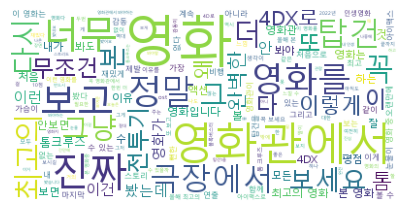

In [112]:
# 워드클라우드를 이욯해서 시각화

# 시각화의 (너비, 높이) 크기 설정
plt.figure(figsize=(5,10))# (2,4) ==> (좌우, 상하)

# 워드클라우드를 이용해서 시각화
plt.imshow(wc)

# axis() : x축 , y축 라벨 출력 관련 함수
# 기본값 : x축, y축 정보 자동 할댕(축 라벨 표현 유무)
plt.axis('off')

### 데이터 수집 순서 정리
1. 사용할 라이브러리 로딩 ( requests, BeautifulSoup 등..)
2. requests를 활용해서 웹 페이지 요청( hearders 설정, params는 선택저으로)
3. 받아온 데이터를 BeautifulSoup으로 객체화 진행
4. 객체화된 데이터에서 select() 또는 select_one()을 활용해서 데이터 수집
5. 수집된 데이터에서 text(순수 컨텐츠) 속성으로 접근해서 파일 형태로 저장